In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = {
    'calories': [200, 350, 500, 700, 1000, 800, 450, 600, 750, 300],
    'distance_km': [1.5, 2.0, 3.0, 4.5, 6.0, 5.0, 2.5, 3.5, 4.2, 1.8],
    'exercise_minutes': [15, 25, 40, 55, 80, 60, 30, 45, 50, 20],
    'weight_loss_kg': [0.1, 0.2, 0.35, 0.6, 1.0, 0.8, 0.3, 0.5, 0.65, 0.15]
}

In [3]:
df = pd.DataFrame(data)
print(df.head())

   calories  distance_km  exercise_minutes  weight_loss_kg
0       200          1.5                15            0.10
1       350          2.0                25            0.20
2       500          3.0                40            0.35
3       700          4.5                55            0.60
4      1000          6.0                80            1.00


In [4]:
X = df[['calories', 'distance_km', 'exercise_minutes']]
y = df['weight_loss_kg']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

In [8]:
y_pred = knn.predict(X_test_scaled)

In [9]:
print("\nR² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² score: 0.9945130315500685
MSE: 0.000277777777777779


In [10]:
comparison = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred})
print("\nReal vs. Predicted:\n", comparison)



Real vs. Predicted:
    Real  Predicted
0  0.65   0.633333
1  0.20   0.183333


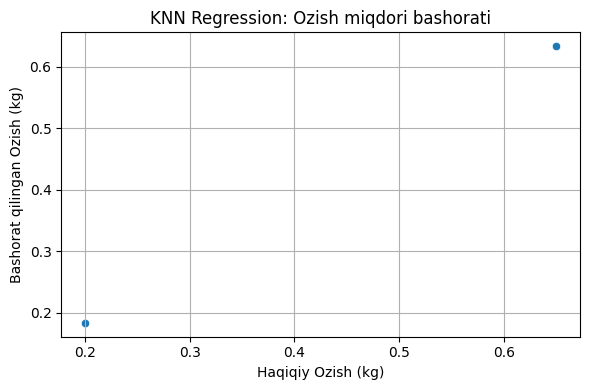

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Haqiqiy Ozish (kg)")
plt.ylabel("Bashorat qilingan Ozish (kg)")
plt.title("KNN Regression: Ozish miqdori bashorati")
plt.grid(True)
plt.tight_layout()
plt.show()